<a href="https://colab.research.google.com/github/syous154/Project/blob/main/test_image_%EB%B0%B0%EA%B2%BD%EC%A0%9C%EA%B1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import cv2
import torch
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


In [ ]:
!pip install rembg
from rembg.bg import remove as remove_bg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 M

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, img_path_list, label_list, transforms=None):
        self.img_path_list = img_path_list
        self.label_list = label_list
        self.transforms = transforms
        
    def __getitem__(self, index):
        img_path = self.img_path_list[index]
        
        image = cv2.imread(img_path)
        image = remove_bg(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transforms is not None:
            image = self.transforms(image=image)['image']
        
        if self.label_list is not None:
            label = torch.FloatTensor(self.label_list[index])
            return image, label
        else:
            return image
        
    def __len__(self):
        return len(self.img_path_list)


In [ ]:
CFG = {
    'IMG_SIZE':300,
    'EPOCHS':15,
    'LEARNING_RATE':0.001,
    'BATCH_SIZE':16,
    'SEED':41
}

In [ ]:
test_transform = A.Compose([
                            A.Resize(CFG['IMG_SIZE'],CFG['IMG_SIZE']),
                            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=False, p=1.0),
                            ToTensorV2()
                            ])

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/dataset/test.csv')
test_dataset = CustomDataset('/content/drive/MyDrive/Colab_Notebooks/dataset/test/'+test['id']+'.jpg', None, test_transform)
test_loader = DataLoader(test_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=False, num_workers=0)


(224, 224, 3)


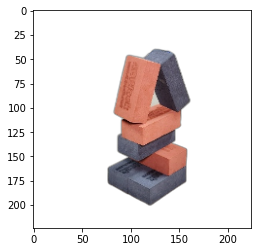

In [ ]:
img =cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Notebooks/dataset/test/TEST_00000.jpg'), cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
plt.imshow(remove_bg(img))
print(img.shape)

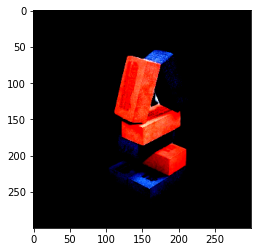

In [ ]:
idx = 0
for image in iter(test_loader):
  img = np.transpose(image, (0, 2, 3, 1))
  plt.imshow(img[idx])
  break

In [ ]:
test['id'].values

array(['TEST_00000', 'TEST_00001', 'TEST_00002', ..., 'TEST_01457',
       'TEST_01458', 'TEST_01459'], dtype=object)

(400, 400, 3)


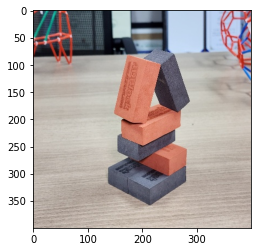

In [ ]:
for name in test['id'].values:
  image = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Notebooks/dataset/test/' + str(name) +'.jpg'), cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  print(image.shape)
  break  

(400, 400, 3)


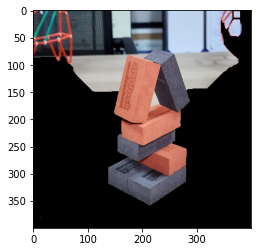

(400, 400, 3)


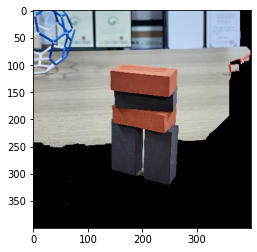

(400, 400, 3)


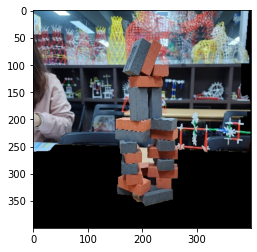

(400, 400, 3)


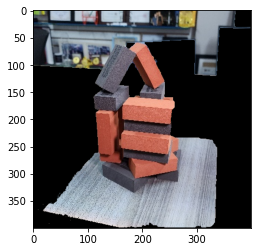

(400, 400, 3)


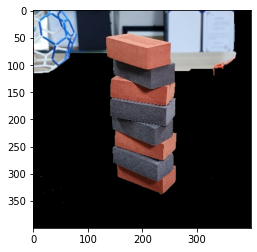

(400, 400, 3)


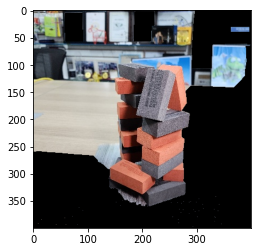

(400, 400, 3)


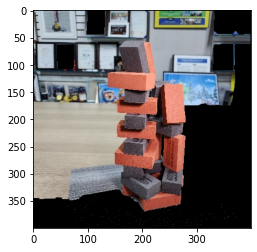

(400, 400, 3)


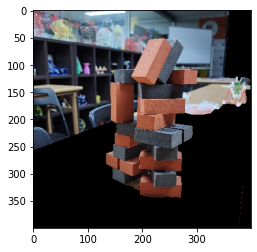

(400, 400, 3)


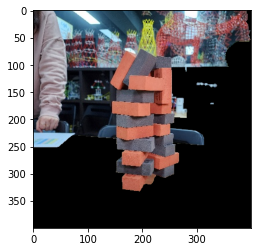

(400, 400, 3)


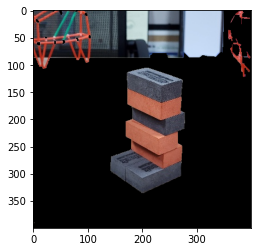

(400, 400, 3)


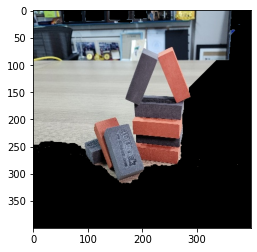

In [ ]:
idx = 0;
for name in test['id'].values:
  image = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Notebooks/dataset/test/' + str(name) +'.jpg'), cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  print(image.shape)
  rectangle = (0, 0, 399, 399)

# 초기 마스크 생성
  mask = np.zeros(image.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
  bgdModel = np.zeros((1, 65), np.float64)
  fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
  cv2.grabCut(image, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
  mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

  # 이미지에 새로운 마스크를 곱행 배경을 제외
  image_rgb_nobg = image * mask_2[:, :, np.newaxis]

# plot
  plt.imshow(image_rgb_nobg)
  plt.show()
  if idx == 10:
    break
  idx+=1

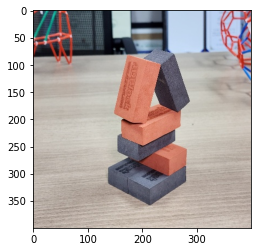

In [ ]:
idx = 0;
for name in test['id'].values:
  img = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Notebooks/dataset/test/' + str(name) +'.jpg'), cv2.COLOR_BGR2RGB)

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 임계값 조절
  mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

# mask
  mask = 255 - mask

# morphology 적용
# borderconstant 사용
  kernel = np.ones((3,3), np.uint8)
  mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# anti-alias the mask
# blur alpha channel
  mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

# linear stretch so that 127.5 goes to 0, but 255 stays 255
  mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

# put mask into alpha channel
  result = img.copy()
  result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
  result[:, :, 3] = mask
  
  break

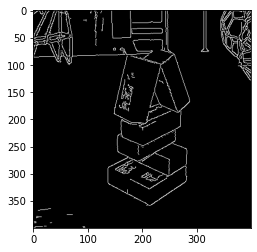

In [ ]:

for name in test['id'].values:
  
  image_gray = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Notebooks/dataset/test/' + str(name) +'.jpg'), cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산
  median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임곗값으로 지정
  lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
  upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
# Canny edge detection 적용
  image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

  plt.imshow(image_canny, cmap='gray')
  plt.show()
  break
 

In [ ]:
!pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 K

(400, 400, 3)
<class 'numpy.ndarray'>
(400, 400, 3)
<class 'numpy.ndarray'>


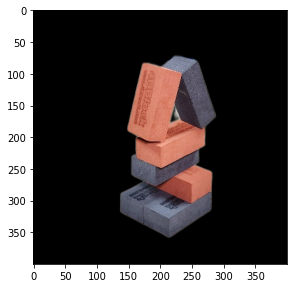

In [ ]:

def show_rembg(path):
    fig = plt.figure(figsize=(10, 10))
    
    # show original image
    fig.add_subplot(1, 2, 1)
    orig_img = cv2.imread(path)
    #plt.imshow(orig_img)
    
    # show bg removed image
    #fig.add_subplot(1, 2, 2)
    #f = np.fromfile(path)
    
    #started = time.time()
    result = remove_bg(orig_img)
    #elapsed = time.time() - started
    #print(f'it takes {elapsed} seconds for removing bg.')
    plt.imshow(result)
#    img = Image.open(io.BytesIO(result)).convert("RGBA")
#    plt.imshow(img)
    
# Usage
for name in test['id'].values:
  show_rembg('/content/drive/MyDrive/Colab_Notebooks/dataset/test/' + str(name) +'.jpg')